In [ ]:
import numpy as np
from sklearn.impute import KNNImputer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 1. Reading and data cleaning

Here, we read the data, look at the columns, will fix the data types

In [1]:
import pandas as pd

# Load the datasets
df = pd.read_csv('car_data/vehicle_data.csv')

df.head()

,first_listed,listing_removed,seller_type,age_in_mths,kms,color,state,price_drop_count,sale_price,vehicle_rrp,...,transmission_type,drive_type,fuel_type,wheelbase_type,body_config_type,power_kw,num_doors,num_seats,num_gears,capacity_cc
0,2023-06-29,2023-09-22,dealer,17,4685,Cape York Green,VIC,5,68008,56963.0,...,Automatic,2WD,Petrol,NaN,NaN,115.0,5.0,5.0,7.0,1499.0
1,2023-10-19,2023-12-01,dealer,17,9560,Orange,WA,3,69759,56963.0,...,Automatic,2WD,Petrol,NaN,NaN,115.0,5.0,5.0,7.0,1499.0
2,2023-06-03,2023-08-30,dealer,17,8256,Phytonic Blue,NSW,8,63358,56963.0,...,Automatic,2WD,Petrol,NaN,NaN,115.0,5.0,5.0,7.0,1499.0
3,2023-10-20,2023-12-23,dealer,17,5355,San Remo Green,NSW,6,63459,56963.0,...,Automatic,2WD,Petrol,NaN,NaN,115.0,5.0,5.0,7.0,1499.0
4,2023-06-24,2023-09-10,dealer,17,5190,Utah Orange,VIC,10,65024,56963.0,...,Automatic,2WD,Petrol,NaN,NaN,115.0,5.0,5.0,7.0,1499.0


In [2]:
print(f"Dataframe shape: {df.shape}\n Cols:")
df.columns

Dataframe shape: (862544, 31)
 Cols:


Index(['first_listed', 'listing_removed', 'seller_type', 'age_in_mths', 'kms',
       'color', 'state', 'price_drop_count', 'sale_price', 'vehicle_rrp',
       'rv_pct', 'segment', 'sub_segment', 'make', 'model', 'year', 'badge',
       'series', 'vehicle_title', 'model_year', 'body_type',
       'transmission_type', 'drive_type', 'fuel_type', 'wheelbase_type',
       'body_config_type', 'power_kw', 'num_doors', 'num_seats', 'num_gears',
       'capacity_cc'],
      dtype='object')

In [3]:
df.dtypes

first_listed          object
listing_removed       object
seller_type           object
age_in_mths            int64
kms                    int64
color                 object
state                 object
price_drop_count       int64
sale_price             int64
vehicle_rrp          float64
rv_pct               float64
segment               object
sub_segment           object
make                  object
model                 object
year                   int64
badge                 object
series                object
vehicle_title         object
model_year            object
body_type             object
transmission_type     object
drive_type            object
fuel_type             object
wheelbase_type        object
body_config_type      object
power_kw             float64
num_doors            float64
num_seats            float64
num_gears            float64
capacity_cc          float64
dtype: object

Fixing the data formats (e.g. first_listed is datetime):

In [4]:
# Convert date columns to datetime
df['first_listed'] = pd.to_datetime(df['first_listed'])
df['listing_removed'] = pd.to_datetime(df['listing_removed'])

# Convert relevant columns to appropriate types
df['age_in_mths'] = pd.to_numeric(df['age_in_mths'], errors='coerce')
df['kms'] = pd.to_numeric(df['kms'], errors='coerce')
df['sale_price'] = pd.to_numeric(df['sale_price'], errors='coerce')
df['power_kw'] = pd.to_numeric(df['power_kw'], errors='coerce')
df['num_doors'] = pd.to_numeric(df['num_doors'], errors='coerce')
df['num_seats'] = pd.to_numeric(df['num_seats'], errors='coerce')
df['num_gears'] = pd.to_numeric(df['num_gears'], errors='coerce')
df['capacity_cc'] = pd.to_numeric(df['capacity_cc'], errors='coerce')

# 2. Exploratory Data Analysis (EDA)

Here, we look at statitical summery of both numerical and categorigal variables 

In [5]:
# Descriptive Statistics numerics
df.describe()

,first_listed,listing_removed,age_in_mths,kms,price_drop_count,sale_price,vehicle_rrp,rv_pct,year,power_kw,num_doors,num_seats,num_gears,capacity_cc
count,862544,862544,862544.000000,862544.000000,862544.000000,862544.000000,8.489050e+05,848905.000000,862544.000000,860652.000000,862476.000000,861926.000000,861952.000000,637646.000000
mean,2023-08-18 16:37:40.475986688,2023-10-03 04:00:34.524847616,98.802589,123042.250394,1.197509,28081.092481,4.776515e+04,60.027202,2015.183118,138.687703,4.415158,5.005756,5.912852,2435.003943
min,2022-01-02 00:00:00,2023-07-03 00:00:00,17.000000,3896.000000,0.000000,1553.000000,1.085700e+04,0.200000,2009.000000,1.000000,2.000000,2.000000,1.000000,647.000000
25%,2023-07-09 00:00:00,2023-08-20 00:00:00,65.000000,63550.750000,0.000000,13455.000000,3.028200e+04,36.900000,2012.000000,110.000000,4.000000,5.000000,5.000000,1968.000000
50%,2023-08-29 00:00:00,2023-10-06 00:00:00,101.000000,113355.000000,0.000000,22253.000000,4.130700e+04,57.700000,2015.000000,129.000000,5.000000,5.000000,6.000000,2191.000000
75%,2023-10-18 00:00:00,2023-11-17 00:00:00,137.000000,170355.000000,2.000000,36113.000000,5.653200e+04,80.900000,2018.000000,150.000000,5.000000,5.000000,7.000000,2953.000000
max,2023-12-30 00:00:00,2023-12-30 00:00:00,173.000000,790355.000000,181.000000,155768.000000,1.129118e+06,1060.000000,2022.000000,620.000000,5.000000,15.000000,10.000000,7008.000000
std,NaN,NaN,45.355036,75815.855383,2.095604,21439.568766,3.112173e+04,30.611240,3.779586,51.732869,0.879963,1.117405,1.637889,920.357619


In [6]:
# Descriptive stats categorical
df.describe(include='object').T

,count,unique,top,freq
seller_type,862544,2,private,573657
color,844475,2638,white,140575
state,862544,8,NSW,254042
segment,862544,5,PAS,378496
sub_segment,862544,13,Medium,219709
make,862544,83,Toyota,151008
model,862544,716,Ranger,29149
badge,805175,3308,Active,21925
series,825026,1246,GUN126R,11637
vehicle_title,862544,30611,2019 Toyota Camry Ascent Auto,852


In [7]:
# extracting numeric vs catogorical features for further EDA

numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist() #extracting numeric cols
cat_cols = df.select_dtypes(include='object').columns.tolist()  # extracting categotical cols

## 2.1 EDA: Distributions

Here, I look at some selected features distributions (both numeric and categorical)

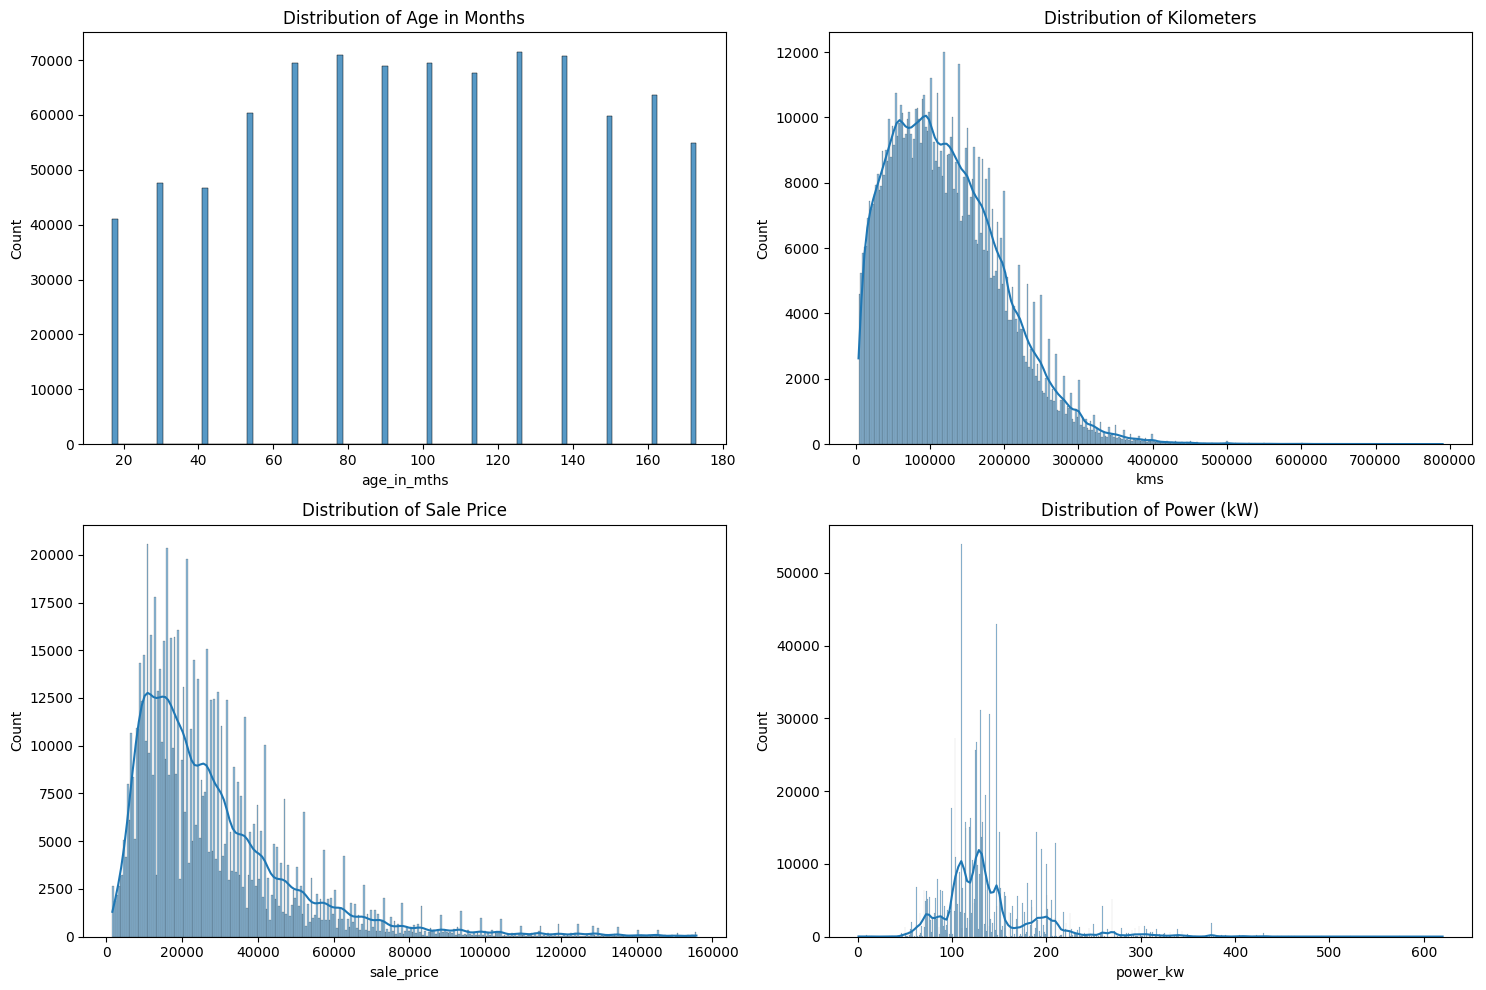

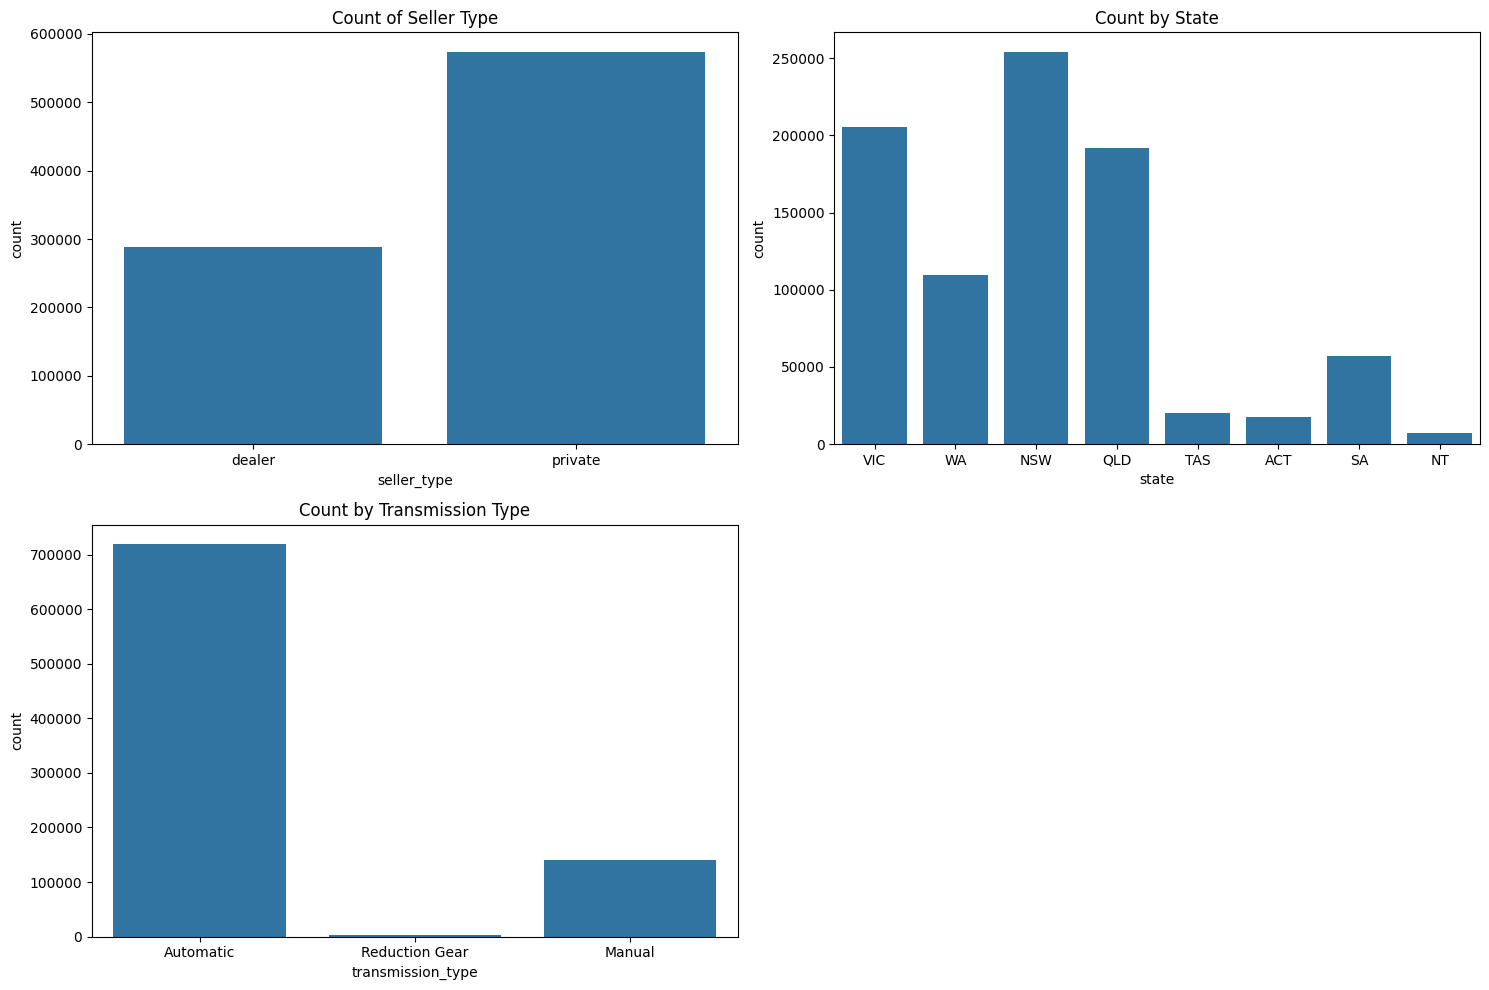

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


# Visualizations
plt.figure(figsize=(15, 10))

# Distribution plots for continuous variables
plt.subplot(2, 2, 1)
sns.histplot(df['age_in_mths'])
plt.title('Distribution of Age in Months')

plt.subplot(2, 2, 2)
sns.histplot(df['kms'], kde=True)
plt.title('Distribution of Kilometers')

plt.subplot(2, 2, 3)
sns.histplot(df['sale_price'], kde=True)
plt.title('Distribution of Sale Price')

plt.subplot(2, 2, 4)
sns.histplot(df['power_kw'], kde=True)
plt.title('Distribution of Power (kW)')

plt.tight_layout()
plt.show()

# Bar charts for categorical variables
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.countplot(data=df, x='seller_type')
plt.title('Count of Seller Type')

plt.subplot(2, 2, 2)
sns.countplot(data=df, x='state')
plt.title('Count by State')


plt.subplot(2, 2, 3)
sns.countplot(data=df, x='transmission_type')
plt.title('Count by Transmission Type')

plt.tight_layout()
plt.show()


## 2.2 EDA: Correlation analysis

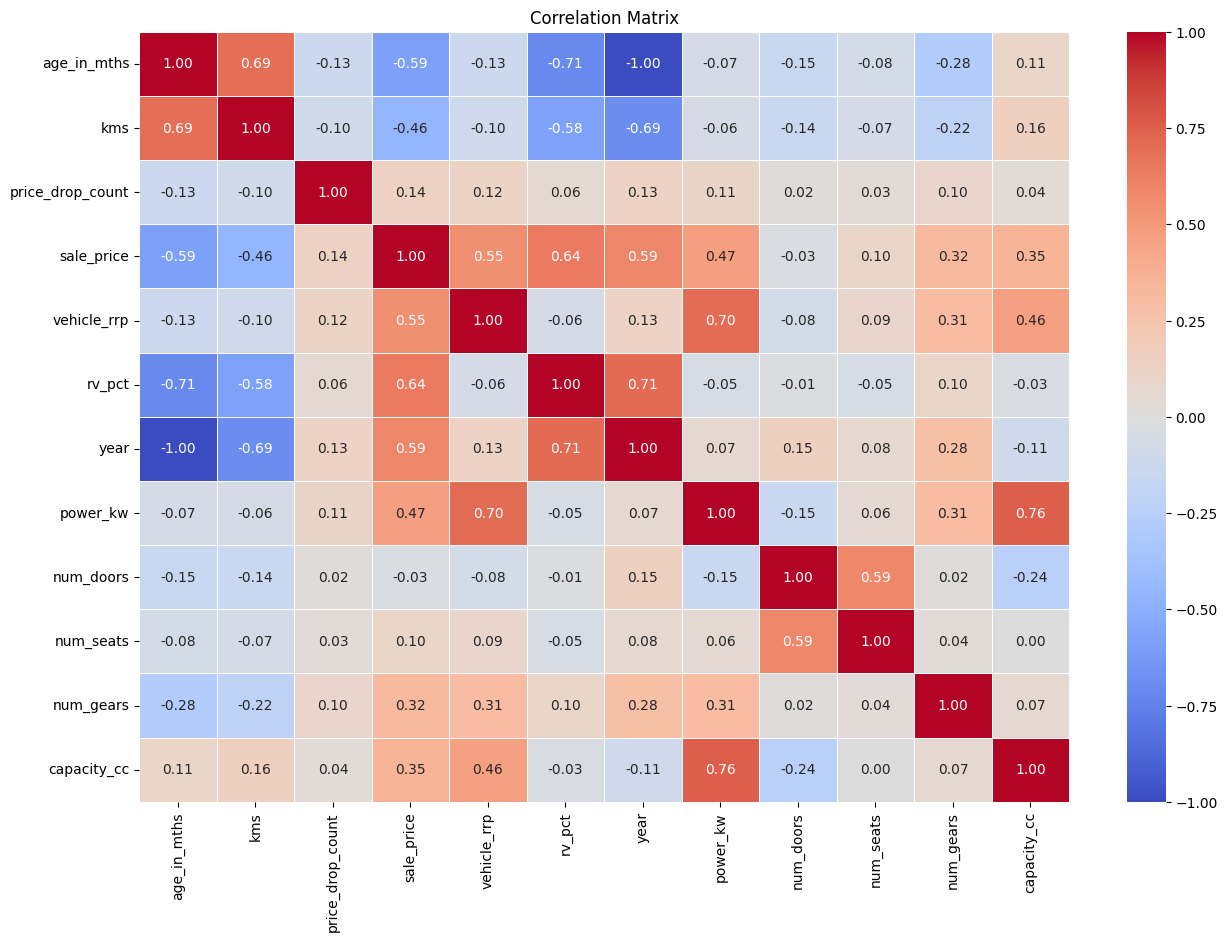

In [9]:
# Correlation Analysis
correlation_matrix = df[numeric_cols].corr()

# Plotting the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

* **Age (months):**
    * Positively correlated with kilometers (older cars have higher mileage)
    * Negatively correlated with sales price and retained value (older cars sell for less and depreciate more)
* **Sales price:**
    * Negatively correlated with kilometers (lower mileage brings higher prices)
    * Positively correlated with retained value percentage

We can iterate more feaures and interpret it



## 2.3 EDA: Price vs. its highly correlated features

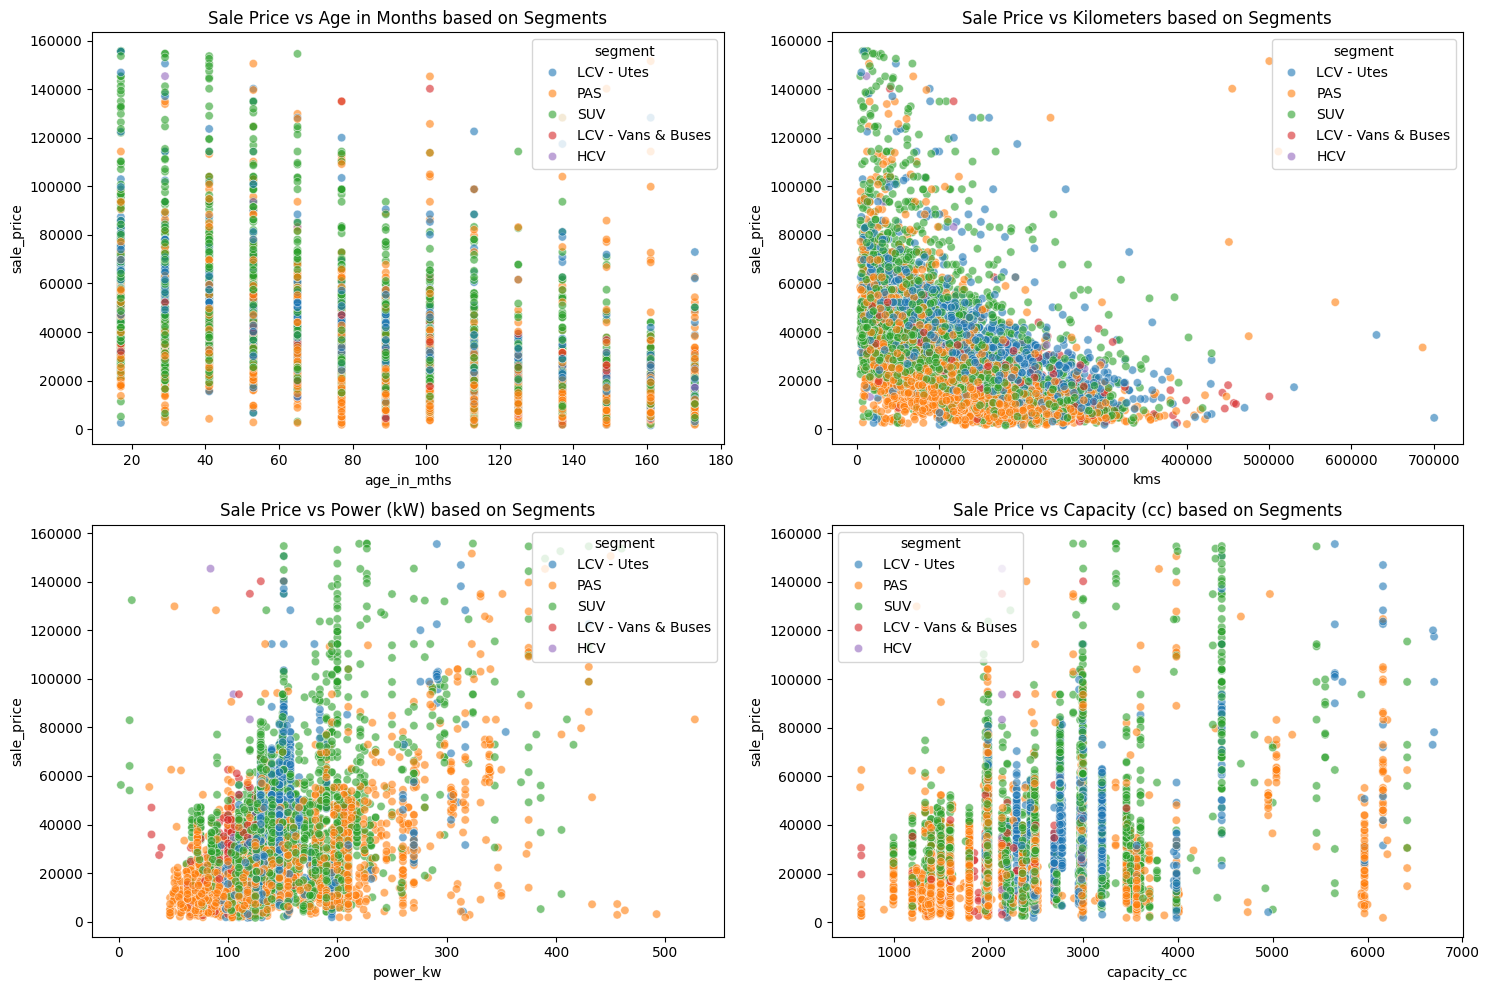

In [10]:
# Scatter plots for key correlations
plt.figure(figsize=(15, 10))

# since it's a big dataset
scatter_df = df.sample(8000) # 1% random sample

plt.subplot(2, 2, 1)
sns.scatterplot(data=scatter_df, x='age_in_mths', y='sale_price', hue='segment', alpha=.6)
plt.title('Sale Price vs Age in Months based on Segments')

plt.subplot(2, 2, 2)
sns.scatterplot(data=scatter_df, x='kms', y='sale_price', hue='segment', alpha=.6)
plt.title('Sale Price vs Kilometers based on Segments')

plt.subplot(2, 2, 3)
sns.scatterplot(data=scatter_df, x='power_kw', y='sale_price', hue='segment', alpha=.6)
plt.title('Sale Price vs Power (kW) based on Segments')

plt.subplot(2, 2, 4)
sns.scatterplot(data=scatter_df, x='capacity_cc', y='sale_price', hue='segment', alpha=.6)
plt.title('Sale Price vs Capacity (cc) based on Segments')

plt.tight_layout()
plt.show()

## 2.4 EDA: Trend analysis

In [11]:
# To be added

# 3. Data Pre-Processing and Feature Engineering

## 3.1 Handling Missing Values

A couple of approaches to handle missing values:

*   Drop NAs (cols or rows)
*   Imputation:
    *    k-Nearest Neighbor
    *    Mode for categoricals, mean for numerics,
*   Assuming NAs are just another value (or category) in categorical variables (only for categorical variables).

First, let's list all features with the total number of missing values and then come up with a treatment.

In [12]:
# counting NAs
na_count = df.apply(lambda x: x.isnull().sum(), axis=0)
na_percentage = df.apply(lambda x: 100 * x.isnull().sum() / len(x), axis=0)

# Combine both series into a DataFrame
na_df = pd.DataFrame({'Missing Values': na_count, 'Percentage': na_percentage})

na_df[na_df['Missing Values'] > 0]

,Missing Values,Percentage
color,18069,2.094850
vehicle_rrp,13639,1.581253
rv_pct,13639,1.581253
badge,57369,6.651139
series,37518,4.349691
model_year,55342,6.416136
wheelbase_type,845221,97.991639
body_config_type,714778,82.868584
power_kw,1892,0.219351
num_doors,68,0.007884


Because the goal here is to pedict rv_pct (Retained Value percentage) and it's a small percentage, I'm going to remove the rows in which rv_pct (the target var) is missing. I'll discuss it in the prediction section why rv_pct was chosed

In [13]:
df.dropna(subset=['rv_pct'], inplace=True)

# counting NAs
na_count = df.apply(lambda x: x.isnull().sum(), axis=0)
na_percentage = df.apply(lambda x: 100 * x.isnull().sum() / len(x), axis=0)

# Combine both series into a DataFrame
na_df = pd.DataFrame({'Missing Values': na_count, 'Percentage': na_percentage})

na_df[na_df['Missing Values'] > 0]

,Missing Values,Percentage
color,17742,2.089987
badge,53297,6.278323
series,33016,3.889246
model_year,42276,4.980063
wheelbase_type,831953,98.003075
body_config_type,701937,82.687344
power_kw,486,0.057250
num_doors,59,0.006950
capacity_cc,223582,26.337694


### Our approach to handle missing values

- Since `wheebase_type `and `body_config` have a lot of missing values, I introduce a new label 'NA' for their missing value;
- For the rest of catogirical features, I impute the value based on the mode per car segment (as oppose to overall mode);
- For numeric features, I usually employ KNN impute with more than 3 neighbours. However, here due to computational limitation (my laptop's limitation), I use mean for each segment. (I leff the code for KNN impute in the cell below) 

In [14]:
import warnings
warnings.filterwarnings('ignore')


In [15]:
import numpy as np
from sklearn.impute import KNNImputer

### ADDING NEW LABEL ###
# Replace missing values in 'wheelbase_type' and 'body_config_type' with 'NA'
df['wheelbase_type'].fillna('NA', inplace=True)
df['body_config_type'].fillna('NA', inplace=True)



### USING MODE for categoricals ###

# Fill missing values in categorical columns with the mode
cat_cols = df.select_dtypes(include=['object']).columns

for segment in df['segment'].unique():
    for col in cat_cols:
      # Select rows for the specific segment
      segment_data = df.loc[df['segment'] == segment]
      # Impute missing values using mode for the category column within the segment
      segment_data[col].fillna(segment_data[col].mode()[0], inplace=True)
      # Update the original dataframe with the modified segment data
      df.update(segment_data)

### USING KNN  for numerics ###

# Identify numeric columns
#numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
#imputer = KNNImputer(n_neighbors=2)
#df[numeric_columns] = imputer.fit_transform(df[numeric_columns])


### USING MEAN for numerics ###

for segment in df['segment'].unique():
    for col in numeric_cols:
      # Select rows for the specific segment
      segment_data = df.loc[df['segment'] == segment]
      # Impute missing values using the chosen method for the numeric column within the segment
      segment_data[col].fillna(segment_data[col].mean(), inplace=True)  # Use mean for numeric imputation
      # Update the original dataframe with the modified segment data
      df.update(segment_data)



# checking for NAs:
print(df.isnull().values.any())

False


## 3.2 Feature Engineering

### A. Feature selection

These variables are removed:
- 'listing_removed': Since it's not related to rv_pct and we already have 'first_listed'
- 'sale_price': because our focus is to predict rv_pct

In [2]:
df.drop(columns=['listing_removed','sale_price'], inplace=True)

### B. Adding new features

**Interaction Features:** These features are often refined through communication with the stakeholders. Here, as an example and based on my knowledge, I add the age km interaction feature:

In [3]:
df['age_kms_interaction'] = df['age_in_mths'] * df['kms']

**Exctractin time feature**: Extracting year and month from `first_listed`

In [4]:
df['first_listed_year'] = df['first_listed'].dt.year
df['first_listed_month'] = df['first_listed'].dt.month

We can also add **polynomial features** to capture more complex relationships. However, I left it for future works.

### C. Encoding categorical variables

Before we encode categorical variables, let's have look at their statistics:

In [5]:
df.describe(include='object').T

,count,unique,top,freq
seller_type,848905,2,private,562935
color,848905,2630,white,154606
state,848905,8,NSW,250224
segment,848905,5,PAS,369229
sub_segment,848905,13,Medium,218350
make,848905,74,Toyota,144963
model,848905,635,Ranger,29131
badge,848905,3067,Active,49354
series,848905,1111,GUN126R,22333
vehicle_title,848905,29526,2019 Toyota Camry Ascent Auto,852


As we can see, features `vehicle_title`, `badge`, `color`, and `series` have too many unique values and this may lead to curse of dimensionality. I'd assume that `make` and `model` have the necessary information, and therefore, I remove these features. Usually, these two steps can be taken:

- Taking to SMEs and making sure feature removal is ok
- Running the model with and without these features as a test and see if they have any impact on the model according to feature importance.

After removing these features, I employ **one-hot encoding** for categorical feature.

In [6]:
df.drop(columns=['vehicle_title', 'badge','series', 'color'], inplace=True)

numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist() #extracting numeric cols
cat_cols = df.select_dtypes(include='object').columns.tolist()  # extracting categotical cols

df = pd.get_dummies(df, columns=cat_cols, drop_first=True) #one-hot encoding

df.shape

(848905, 827)

### D. Feature Transformation

Adding the log transformations of highly skewed numerical features in case we have any. 
- Step 1: check for highly skewed.
- Step 2: add log trasformation

In [7]:
# Calculate skewness for numerical features
skewness = df[numeric_cols].skew().sort_values(ascending=False)

# Identify highly skewed features (absolute skewness > 1)
highly_skewed_features = skewness[abs(skewness) > 1]

print("\nHighly skewed features:")
print(highly_skewed_features)


Highly skewed features:
vehicle_rrp            5.443439
price_drop_count       5.352631
rv_pct                 2.075860
power_kw               1.835917
capacity_cc            1.831340
age_kms_interaction    1.161395
num_doors             -1.627719
dtype: float64


8 features have high skewness. We add log transform of these features to the dataset:

In [8]:
# removing rv_pct from highly skewed because it's the target variable
del highly_skewed_features['rv_pct']

# Apply log transformation to highly skewed features
for feature in highly_skewed_features.index:
    df[feature+"_log"] = np.log1p(df[feature])
    
    
    
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist() #extracting numeric cols
cat_cols = df.select_dtypes(include='object').columns.tolist()  # extracting categotical cols
    
df.shape

(848905, 833)

### E. Tackling the Recency Problem

To give more weight to recent data in a regression problem, we can implement a time-decay factor that assigns higher weights to more recent observations. There are several approaches to give more importances to the recent data. A few approaches are:
- **Weighted Sampling:** Using sample weights during training to give more importance to recent data.
- **Weighted Loss Function:** Adjusting the loss function inside the ML algorithm to consider decay.
- **Using advenced models**: Using advanced Neural Network models that capture recency.

Here, I use weighted sampling in which I give more weights to the recent data:


In [9]:
df['recency'] = (df['first_listed'].max() - df['first_listed']).dt.days

# Normalize recency to a range of [0, 1]
df['recency'] = df['recency'] / df['recency'].max()

# Assign sample weights (e.g., higher weight to more recent data)
# Here we use an exponential decay function, but this can be adjusted
sample_weights = np.exp(-df['recency'])

### F. Scaling and Dropping irrelevant columns

Not need for scaling here because we are using tree-based ensemble approaches and they don't require scaling.

In [10]:
df.drop(columns=['first_listed'], inplace=True)

numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist() #extracting numeric cols
cat_cols = df.select_dtypes(include='object').columns.tolist()  # extracting categotical cols

# 4. Prediction

## 4.1 Selecting Retained Value as the Target Variable


We prefer rv_pct over car sales price for two key reasons:

1. **Easier Error Interpretation:**
   - MAE in car prices (e.g., $5,000) is relative to the car's value. A $5,000 error on a budget car is significant, but negligible for a luxury car.
   - rv_pct's error (e.g., 2% MAE) is a proportional difference, making it easier to compare errors across different car models and price ranges.

2. **Consistent Evaluation Scale:**
   - Car sales prices vary greatly by model, brand, and features, skewing the evaluation scale.
   - rv_pct naturally falls between 0% and 100%, providing a consistent scale to assess prediction errors regardless of underlying car prices.

In short, rv_pct offers a standardised metric for evaluating how well your model predicts car value retention, independent of absolute sales price. This allows for clearer interpretation and comparisons across datasets.


## 4.2 Train/Test Split

We split the data 80/20 with taking recency sampling weight into consideration.
- 80% for Training [using 5-fold cross validation] 
- 20% for Test

The chart below shows my approach:


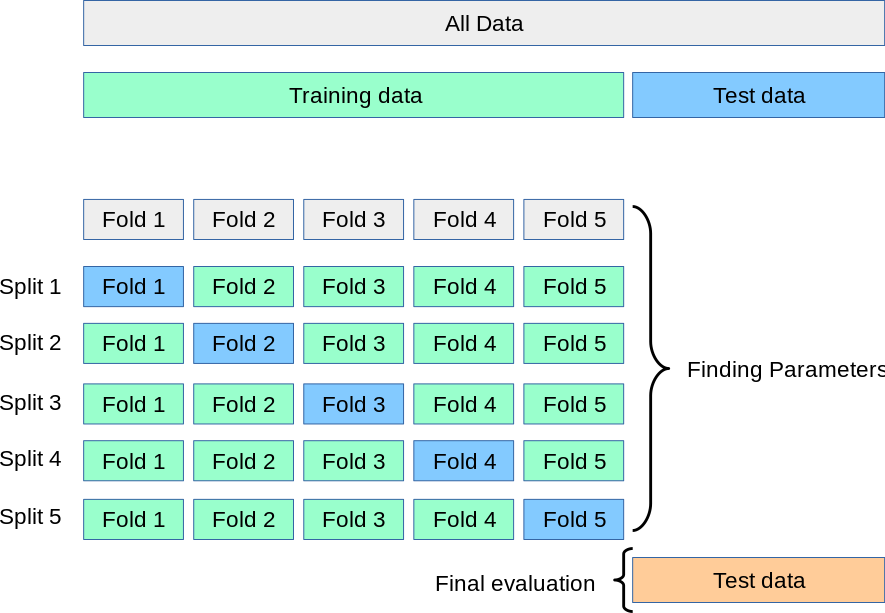

In [12]:
from IPython.display import Image

image = Image(filename='cross_validation.png', width=700)
display(image)


In [2]:
df_copy = df.copy() # back up
y_total = df.pop('rv_pct')


from sklearn.model_selection import train_test_split

X, X_test, y, y_test, weights_train_val, weights_test = train_test_split(df, y_total, sample_weights, test_size=0.2, random_state=1)

## 4.4 Bulding forecasting models 


### 4.4.1 Selecting model performance metrics

I choose R²-Squarred and MAE (Mean Absolute Error) for model performance evaluation:


* **R-squared (R²):** This metric explains the proportion of variance in the target variable that our model can capture. A higher R² indicates that our model explains a greater share of the overall variation. It helps assess how well your model fits the data and explains its trends.

* **MAE (Mean Absolute Error):** This metric measures the average absolute difference between your model's predictions and the actual values. Lower MAE indicates higher accuracy, meaning your predictions are generally close to the real values. It's useful when dealing with outliers, as large errors have a bigger impact on MAE. It's also easy to understand and interpret since it has the same metric as the target variable.

To forecast rv_pct, I employ 3 well-known powerful machine learning models:

- Random Forest
- lightgbm
- xgboost

These ensemble model are good at finding complex relationship and also handle overfitting and outliers well. Also, choosing these models means there's no need to check for multi-colinearity (for linear regression). 

First, we try all three models and select a winner based on R2 metric and then we optimise the result of the winning model.

### A. Random Forest

In [14]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=50) # we can increase it

# Initialize KFold with 5 folds
kf = KFold(n_splits=5, shuffle=True)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_regressor, X, y, cv=kf, scoring='r2', fit_params={'sample_weight': weights_train_val})

# Print the cross-validation scores
print("Cross-validation R^2 scores:", cv_scores)
print("Mean R^2 score:", cv_scores.mean())
print("Standard deviation of R^2 scores:", cv_scores.std())

Cross-validation R^2 scores: [0.69914347 0.69444502 0.70331683 0.68389062 0.69227476]
Mean R^2 score: 0.6946141415422669
Standard deviation of R^2 scores: 0.006584022591266436


### B. lightgbm

In [8]:
import lightgbm as lgb


# Initialize the LightGBM Regressor
lgb_regressor = lgb.LGBMRegressor(n_estimators=50, verbosity=0)

# Initialize KFold with 5 folds
kf = KFold(n_splits=5, shuffle=True)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(lgb_regressor, X, y, cv=kf, scoring='r2', fit_params={'sample_weight': weights_train_val})

# Print the cross-validation scores
print("Cross-validation R^2 scores:", cv_scores)
print("Mean R^2 score:", cv_scores.mean())
print("Standard deviation of R^2 scores:", cv_scores.std())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
Cross-validation R^2 scores: [0.72956002 0.72973719 0.73244039 0.72902909 0.73020388]
Mean R^2 score: 0.7301941142061115
Standard deviation of R^2 scores: 0.001184398849079937


### C. xgboost

In [9]:
import xgboost as xgb

# Initialize the XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(n_estimators=50)

# Initialize KFold with 5 folds
kf = KFold(n_splits=5, shuffle=True)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(xgb_regressor, X, y, cv=kf, scoring='r2', fit_params={'sample_weight': weights_train_val})

# Print the cross-validation scores
print("Cross-validation R^2 scores:", cv_scores)
print("Mean R^2 score:", cv_scores.mean())
print("Standard deviation of R^2 scores:", cv_scores.std())

Cross-validation R^2 scores: [0.71796403 0.71634219 0.71785162 0.71647604 0.71501513]
Mean R^2 score: 0.7167298016608443
Standard deviation of R^2 scores: 0.0010896357568397528


lightgbm is beating the other two model. We select it as the winner model and the next step is to find its best parameter. (Future work (needs more time): fine the optimal parameter for all three models and then compare the result)

### 4.4.2  Hyper-paramter optimisation

I use Optuna for yper-paramter optimisation. Optuna is superior to grid search for hyperparameter optimization due to its efficiency and flexibility. While grid search exhaustively evaluates all combinations, Optuna uses Bayesian optimization to intelligently explore the hyperparameter space, focusing on promising regions based on past evaluations. 

In [3]:
import optuna
from sklearn.model_selection import cross_val_score, KFold
import lightgbm as lgb
from optuna.samplers import TPESampler
import logging

# Set logging level for LightGBM to 'error'
logging.getLogger('lightgbm').setLevel(logging.ERROR)

# Define the objective function for optimization
def objective(trial):
    # Define the hyperparameters to tune
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'n_estimators': trial.suggest_int('n_estimators', 70, 200),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        # Removed less impactful parameters for faster tuning
    }

    # Initialize the LightGBM Regressor with the current hyperparameters
    lgb_regressor = lgb.LGBMRegressor(**params, verbosity=0)

    # Initialize KFold with 5 folds
    kf = KFold(n_splits=5, shuffle=True)

    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(lgb_regressor, X, y, cv=kf, scoring='neg_root_mean_squared_error', fit_params={'sample_weight': weights_train_val})

    # Return the mean of the cross-validation scores as the objective value
    return -cv_scores.mean()

# Create a study object and specify the direction as 'minimize'
study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=10) # we can increase the number of trials

# Print the best parameters and score
print("Best parameters found: ", study.best_params)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-06-24 19:40:14,140] Trial 9 finished with value: 15.401321571575522 and parameters: {'n_estimators': 79, 'learning_rate': 0.09225817086565932, 'num_leaves': 228, 'max_depth': 11}. Best is trial 0 with value: 15.129912283647077.


Best parameters found:  {'n_estimators': 181, 'learning_rate': 0.1269843652033404, 'num_leaves': 296, 'max_depth': 10}


In [5]:
# Print the best parameters and score
print("Best parameters found: ", study.best_params)

Best parameters found:  {'n_estimators': 181, 'learning_rate': 0.1269843652033404, 'num_leaves': 296, 'max_depth': 10}


In [4]:
best_params = {'n_estimators': 181, 'learning_rate': 0.1269843652033404, 'num_leaves': 296, 'max_depth': 10}

## 4.5 Testing the final model

In [6]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, r2_score


best_model = lgb.LGBMRegressor(**study.best_params)
best_model.fit(X, y)

y_pred = best_model.predict(X_test)

print(f"R2: {r2_score(y_pred, y_test)}")
print(f"MAE: {mean_absolute_error(y_pred, y_test)}")

R2: 0.7318000611281248
MAE: 6.87925165812095


# 6. Exctracting Feature Importance 

To identidy the importance of features, I use to methods:

- **lightgbm feature importance:** All tree-based methods return feature importance based on information gain concept
- **SHAP:** SHAP (SHapley Additive exPlanations) feature importance explains model predictions by calculating the contribution of each feature. Based on Shapley values from game theory, SHAP values show how each feature impacts the prediction

I left Permutation importance for future works.

## 6.2 lightgbm feature importance

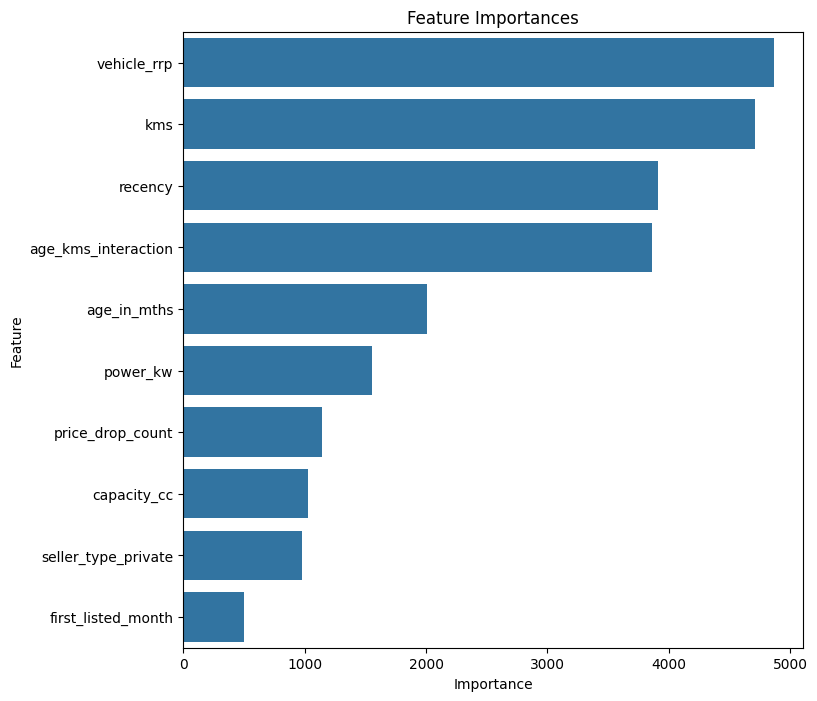

In [6]:
# Extract feature importances
importances = best_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df = importance_df.head(10)

# Plot the feature importances using seaborn
plt.figure(figsize=(8, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## 6.2 SHAP feature importance

In [12]:
import shap


# Initialize the SHAP explainer
explainer = shap.Explainer(best_model)

# Calculate SHAP values for the dataset
sample_df = X.sample(50000).copy()  #when I pass the whole dataset the jupyter crashes -- that's why 50k samples instead is used
shap_values = explainer(sample_df) 

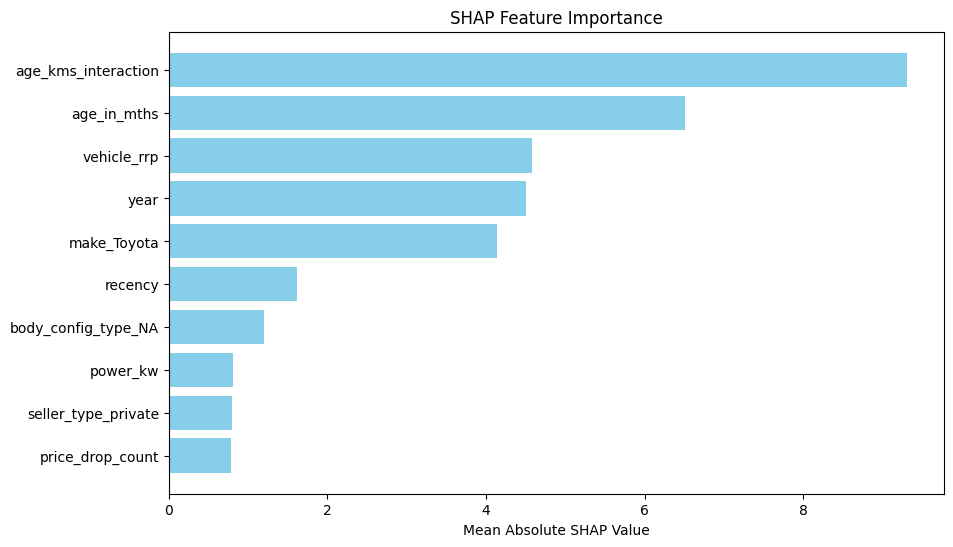

In [13]:
shap_importance = pd.DataFrame({'feature': X.columns, 'importance': np.abs(shap_values.values).mean(axis=0)})
shap_importance = shap_importance.sort_values(by='importance', ascending=False)
shap_importance = shap_importance.head(10)


# Plot bar chart of SHAP feature importance
plt.figure(figsize=(10, 6))
plt.barh(shap_importance['feature'], shap_importance['importance'], color='skyblue')
plt.xlabel('Mean Absolute SHAP Value')
plt.title('SHAP Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
plt.show()

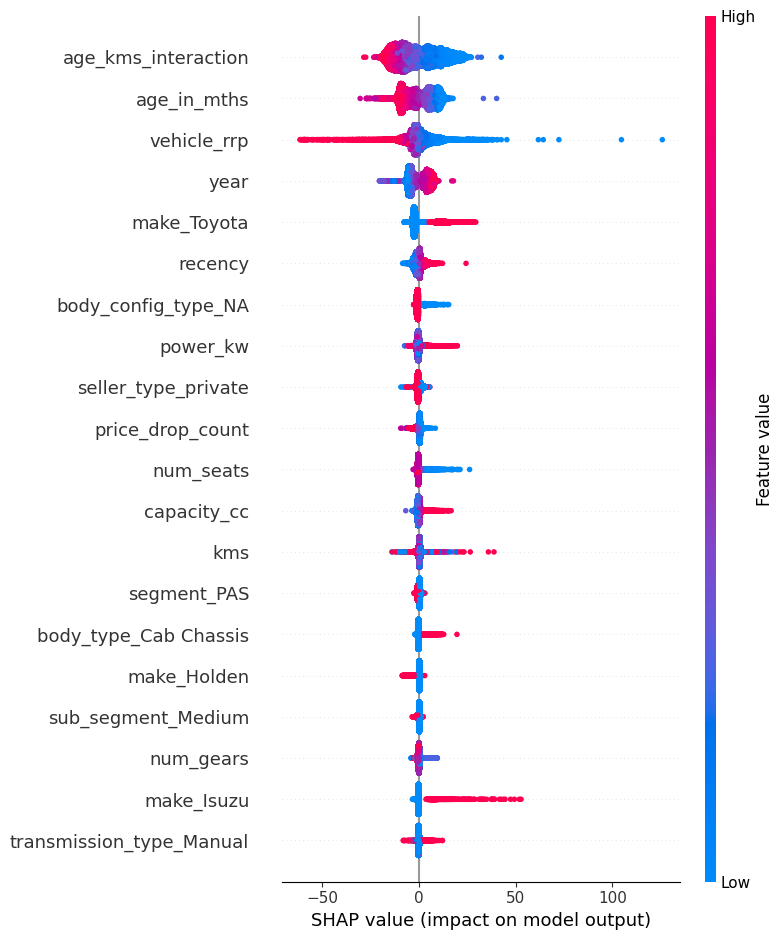

In [14]:
# Plot summary plot of SHAP values (feature importance)
shap.summary_plot(shap_values, sample_df)

# 7. Post-Modelling EDA

Now that we've built a model and idenified the most important features, we can do more EDA with the focus on important features and their interaction with retained value percentage.

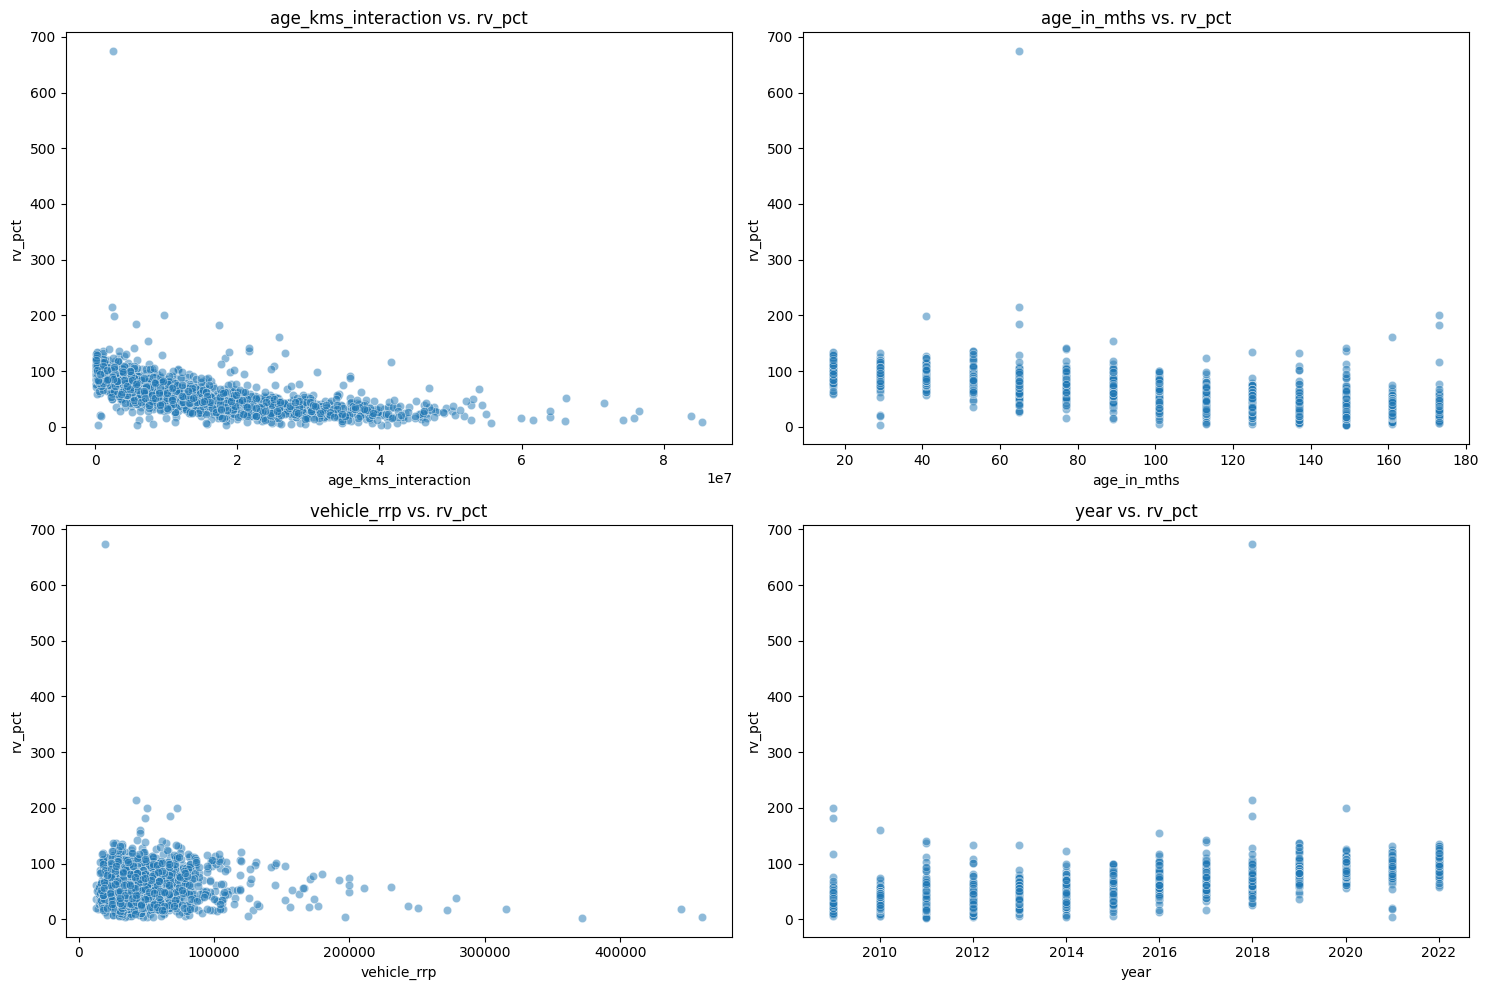

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
sample_df = df_copy.sample(n=2000)

# Select the desired columns
columns_to_plot = ['age_kms_interaction', 'age_in_mths', 'vehicle_rrp', 'year']

# Create scatter plots individually
plt.figure(figsize=(15, 10))

for i, feature in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=sample_df[feature], y=sample_df['rv_pct'],alpha=0.5)
    plt.title(f'{feature} vs. rv_pct')
    plt.xlabel(feature)
    plt.ylabel('rv_pct')

plt.tight_layout()
plt.show()

**Actual vs. Predicted plot and distirbution:**

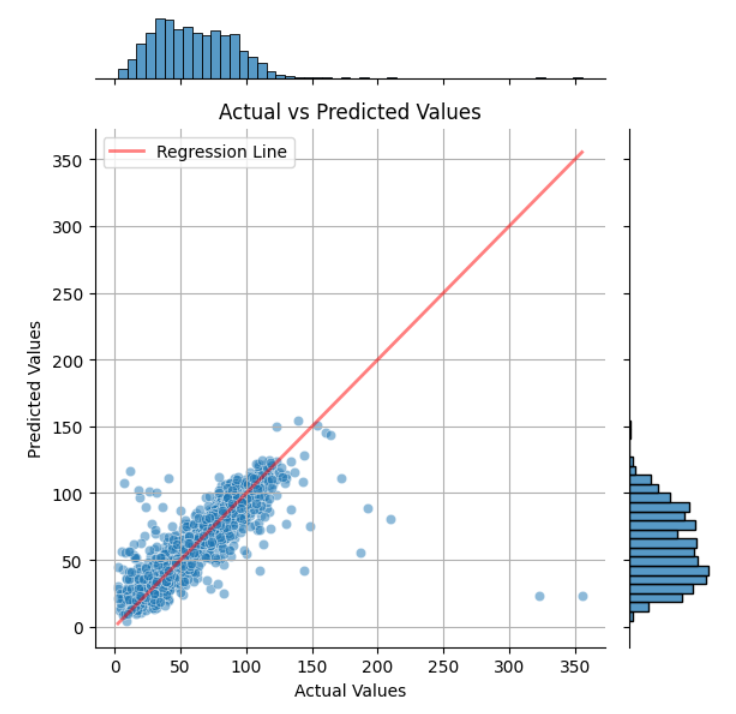

In [22]:
sns.jointplot(x=y_test, y=y_pred, alpha=0.5)

# Add a regression line (optional)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Regression Line', alpha=.5)
plt.legend()

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

**Correlation of the most important features vs. rv_pct:**

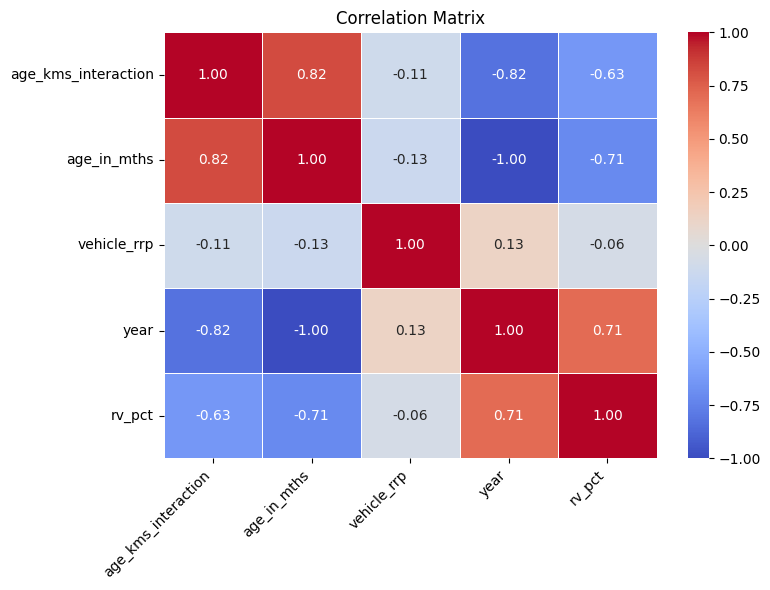

In [23]:
# Correlation Analysis
correlation_matrix = df_copy[['age_kms_interaction',
                               'age_in_mths',
                               'vehicle_rrp',
                               'year',
                               'rv_pct']].corr()

# Plotting the correlation matrix with rotated x-axis labels
plt.figure(figsize=(8, 6))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Rotate x-axis labels 45 degrees
plt.xticks(rotation=45, ha='right')  # ha='right' for right-alignment of rotated text

# Add title
plt.title('Correlation Matrix')

# Show the plot
plt.tight_layout()
plt.show()

# 8. Factoring in different vehicle segments (bonus)

To factor in different vehicle segments, I use segmented modeling. Which has the following steps:

1. Identify the Categorical Variable: Determine which categorical variable we want to segment by.
2. Create Separate Data Subsets: Split the data into subsets based on the unique values of the categorical variable.
3. Build Separate Models: Train a separate regression model for each subset of data.
4. Evaluate Each Model: Evaluate the performance of each model separately.
5. Combine Predictions: Use the appropriate model to make predictions based on the category of the input data.


## 8.1 Building segment models

### Identifying the Categorical Variable

For this example, let's assume we want to create separate models for each unique value of the `segment` variable.

In [24]:
df = df_copy.copy() # reading from back-up (precprecessing and feature eng is done)

unique_segments = df.columns[df.columns.str.startswith('segment')] # extracting segment cols
unique_segments

Index(['segment_LCV - Utes', 'segment_LCV - Vans & Buses', 'segment_PAS',
       'segment_SUV'],
      dtype='object')

Building segmented regressors:

In [25]:
# Dictionary to store models for each segment
segment_models = {}



# Initialize a DataFrame to store the results
predictions_df = pd.DataFrame(columns=['Segment', 'y_seg_pred'])

# Train a model for each segment
for segment in unique_segments:
    # Filter data for the current segment
    segment_data = df[df[segment] == 1]
    
    
    #Filtering latency weights for the feature
    sample_weights_seg = sample_weights[df[segment] == 1]
    
    # Define features and target
    X_seg = segment_data.drop(columns='rv_pct')
    y_seg = segment_data['rv_pct']
    
    
    # Split data into training and testing sets
    X_seg_train, X_seg_test, y_seg_train, y_seg_test, weights_seg_train_val, weights_seg_test = train_test_split(X_seg, y_seg, sample_weights_seg, test_size=0.2, random_state=42)
    
    # Initialize and train the model
    model = lgb.LGBMRegressor(n_estimators=120, random_state=42)
    model.fit(X_seg_train, y_seg_train)
    
    # Store the trained model
    segment_models[segment] = model
    
    # predict using the model
    y_seg_pred = model.predict(X_seg_test)
    
    # Store the segment name and predictions in the DataFrame
    segment_preds_df = pd.DataFrame({
        'Segment': [segment] * len(y_seg_pred),
        'y_seg_pred': y_seg_pred,
        'y_seg_test': y_seg_test.values
    })
    
    predictions_df = pd.concat([predictions_df, segment_preds_df], ignore_index=True)



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3277
[LightGBM] [Info] Number of data points in the train set: 295383, number of used features: 409
[LightGBM] [Info] Start training from score 54.715087
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2967
[LightGBM] [Info] Number of data points in the train set: 250074, number of used features: 303
[LightGBM] [Info] Start training from score 61.591939


Results of the regressors:

In [26]:
for segment in unique_segments:
    # Filter predictions and actual values for the current segment
    segment_data = predictions_df[predictions_df['Segment'] == segment]
    y_seg_test = segment_data['y_seg_test']
    y_seg_pred = segment_data['y_seg_pred']
    
    # Calculate metrics
    mae = mean_absolute_error(y_seg_test, y_seg_pred)
    r2 = r2_score(y_seg_test, y_seg_pred)
    print(f'Segment: {segment}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R-squared: {r2}')
    print('-' * 30)

Segment: segment_LCV - Utes
Mean Absolute Error: 9.997001626571604
R-squared: 0.6210940728378374
------------------------------
Segment: segment_LCV - Vans & Buses
Mean Absolute Error: 10.192543115663
R-squared: 0.6435154379874474
------------------------------
Segment: segment_PAS
Mean Absolute Error: 7.082950897408089
R-squared: 0.6958447414638824
------------------------------
Segment: segment_SUV
Mean Absolute Error: 5.8003445309803485
R-squared: 0.8391974901240415
------------------------------



I'll leave Hpyer-optimising the parameter of segment regressors for futur works (I already did the coding it's in appendix, but due to resorce constraints I'll skip it for now). 

Looking at the results, we can see the segment regressor for 'Segment_SUV' already getting better scores than the overall general regressor. 

## 8.2 Comparing the general model with segment specific model

We focus on `segment_suv`. We use the best model that we trained on all of data to predict the retained value of SUV cars only and then compare it to the 

# 9. Final remarks and recommendations for works

## 9.1 Answering the questions:


- **Chosen AI/ML Algorithm and why?**
Choosing LightGBM, XGBoost, and Random Forest for a regression problem is a solid strategy due to their effectiveness and flexibility in handling a variety of data types and problem complexities. Reasons for choosing Lightgbm 

    - **Speed and Efficiency:** LightGBM is designed to be fast and memory-efficient. It uses histogram-based algorithms, which are faster than traditional tree algorithms.
    - **Handling Large Datasets:** It can handle large datasets with many features efficiently.
    - **Built-in Handling of Missing Values:** LightGBM can automatically handle missing values, making data preprocessing simpler.
    - **Support for Parallel and GPU Learning:** It supports parallel and GPU learning, which can significantly speed up training on large datasets.
    - **Effective with Categorical Features:** LightGBM has good support for categorical features, which can be specified directly.

    **Benefits:**
    - **Fast Training:** Faster training times compared to other gradient boosting algorithms.
    - **Efficiency with Memory Usage:** Lower memory usage due to the histogram-based approach.
    - **Robust Performance:** Generally performs well on a wide variety of tasks.

    **Comparison with Other Algorithms**
    - **Linear Regression:** While simple and interpretable, linear regression assumes a linear relationship between features and target, which may not be suitable for complex, non-linear data. For LR we also need to meet multi-colinearity assumptions and more
    - **Support Vector Regression (SVR):** Effective for small to medium-sized datasets but can be computationally expensive for large datasets.
    - **Neural Networks:** While highly flexible and powerful, neural networks require a large amount of data and computational resources. They can also be prone to overfitting if not properly regularized and require careful tuning of many hyperparameters.



- **How do you split training vs. test vs. validation data?** Detailed answer is in section 4.2.2

- **Metrics to measure model performance?** Detailed answer in section 4.4.1

- **Process of identifying the important features?** Detailed answer in section 6

- **How would you put more recency weight toward the most recent sale data over historical data?** Detailed answer in section 3.2.E

- **Pros and Cons of your model?**

# Pros and Cons of LightGBM in Regression Problems

**Pros:**
1. **Speed and Efficiency:** Fast training and low memory usage.
2. **Handling Large Datasets:** Scalable and optimized for large datasets.
3. **Built-in Handling of Missing Values:** Automatically handles missing values.
4. **Parallel and GPU Learning:** Supports parallel and GPU learning for faster training.
5. **Effective with Categorical Features:** Directly handles categorical features without one-hot encoding.
6. **Flexibility and Customizability:** Wide range of hyperparameters for tuning, applicable to various tasks.

**Cons:**
1. **Complexity in Hyperparameter Tuning:** Many hyperparameters can be overwhelming to tune.
2. **Potential for Overfitting:** Risk of overfitting if not properly tuned.
3. **Sensitivity to Data Quality:** Performance is affected by data quality.
4. **Less Interpretability:** More challenging to interpret compared to simpler models.
5. **GPU Constraints:** Requires sufficient GPU memory for very large datasets.
6. **Implementation Complexity:** Steeper learning curve and requires more expertise.

### Conclusion
LightGBM is a powerful tool for regression, offering advantages in speed, efficiency, and handling large datasets, but it requires careful tuning and expertise to avoid overfitting and interpretability issues.



- **How would you factor in different vehicle depreciation profiles for different vehicle segments, brands, etc.?** Detailed answer in section 8 


## 9.2 Recommendation for future works

- Optimisaing the parameters of more models and comparing the results
- Chaging the main objective from R2 to MAE and comparing the results
- Increasing the trails and the range of parameters in hyper-parameter optimisation
- Using permutation importance and comparing it to SHAP and xgboost feature importance
- Adding polynomial features in the engineering step
- Adding more domain specific interaction features by talking to SMEs
- Trying different values for K in K-fold cross validation


# 10. Appendix

**Segment Segment Regressors Hyper-optimisiation code:**

In [ ]:


import optuna
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as lgb

# Assuming df and sample_weights are already defined

# List of categorical variable categories
unique_segments = df.columns[df.columns.str.startswith('segment')]

# Initialize a DataFrame to store the results
predictions_df = pd.DataFrame(columns=['Segment', 'y_seg_pred', 'y_seg_test'])

# Dictionary to store models for each segment
segment_models = {}

# Objective function for Optuna
def objective(trial, X_train, y_train, X_valid, y_valid, weights_train):
    param = {
        'num_leaves': trial.suggest_int('num_leaves', 31, 70),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 50, 150),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 40)
    }
    
    model = lgb.LGBMRegressor(**param, random_state=42)
    model.fit(X_train, y_train, sample_weight=weights_train)
    y_pred = model.predict(X_valid)
    r2 = r2_score(y_valid, y_pred)
    return r2

# Train and predict for all segments
for segment in unique_segments:
    # Filter data for the current segment
    segment_data = df[df[segment] == 1]
    
    # Filtering latency weights for the feature
    sample_weights_seg = sample_weights[df[segment] == 1]
    
    # Define features and target
    X_seg = segment_data.drop(columns='rv_pct')
    y_seg = segment_data['rv_pct']
    
    # Split data into training and validation sets
    X_seg_train, X_seg_valid, y_seg_train, y_seg_valid, weights_seg_train_val, weights_seg_valid = train_test_split(X_seg, y_seg, sample_weights_seg, test_size=0.2, random_state=42)
    
    # Optimize hyperparameters with Optuna
    study = optuna.create_study(direction='maximize')
    study.optimize(lambda trial: objective(trial, X_seg_train, y_seg_train, X_seg_valid, y_seg_valid, weights_seg_train_val), n_trials=50)
    
    # Get the best model with optimal hyperparameters
    best_params = study.best_params
    best_model_seg = lgb.LGBMRegressor(**best_params, random_state=42)
    best_model_seg.fit(X_seg_train, y_seg_train, sample_weight=weights_seg_train_val)
    
    # Store the trained model
    segment_models[segment] = best_model_seg
    
    # Predict using the model
    y_seg_pred = best_model_seg.predict(X_seg_valid)
    
    # Store the segment name, predictions, and actual test values in the DataFrame
    segment_preds_df = pd.DataFrame({
        'Segment': [segment] * len(y_seg_pred),
        'y_seg_pred': y_seg_pred,
        'y_seg_test': y_seg_valid.values
    })
    
    predictions_df = pd.concat([predictions_df, segment_preds_df], ignore_index=True)

# Display the results
print(predictions_df)
